In [116]:
import pandas as pd

In [117]:
df = pd.read_csv('../../../datasets/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


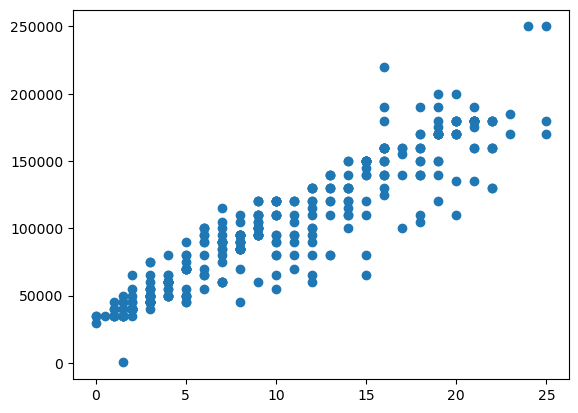

In [118]:
import matplotlib.pyplot as plt
plt.scatter(df['Years of Experience'],df['Salary'])

In [119]:
df.shape

(375, 6)

In [120]:
df['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [121]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [122]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].median(),inplace=True)
df['Salary'].fillna(df['Salary'].median(),inplace=True)

In [123]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [124]:
df['Gender'].value_counts()

Gender
Male      196
Female    179
Name: count, dtype: int64

In [125]:
df['GENDER_enc'] = df['Gender'].map({'Male':0,'Female':1})

In [126]:
df['Education Level'].value_counts()

Education Level
Bachelor's    226
Master's       98
PhD            51
Name: count, dtype: int64

In [127]:
df['EducationLevel_enc'] = df['Education Level'].map({"Bachelor's":0, "Master's":1, "PhD":2})

In [130]:
df.corr(numeric_only=True)['Salary']

Age                    0.922326
Years of Experience    0.930340
Salary                 1.000000
GENDER_enc            -0.070337
EducationLevel_enc     0.669822
Name: Salary, dtype: float64

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Age','Years of Experience']])
df[['Age','Years of Experience']] = scaler.transform(df[['Age','Years of Experience']])

In [132]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'GENDER_enc', 'EducationLevel_enc'],
      dtype='object')

In [140]:
X = df[['Age', 'Years of Experience', 'GENDER_enc', 'EducationLevel_enc']]
y = df['Salary']

(array([63., 49., 34., 52., 37., 38., 17., 36., 38.,  7.]),
 array([ 30000.,  47000.,  64000.,  81000.,  98000., 115000., 132000.,
        149000., 166000., 183000., 200000.]),
 <BarContainer object of 10 artists>)

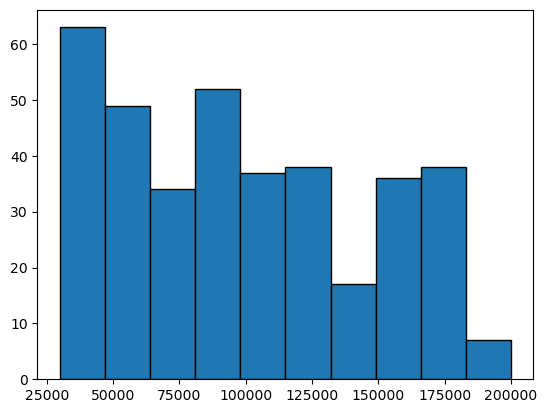

In [141]:
plt.hist(df['Salary'], edgecolor='black')

In [142]:
sum(df['Salary']<25000)

0

In [143]:
sum(df['Salary']>200000)

0

In [144]:
df = df[df['Salary'] <= 200000].reset_index(drop=True)
df = df[df['Salary'] >= 25000].reset_index(drop=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,GENDER_enc,EducationLevel_enc
0,0.300000,Male,Bachelor's,Software Engineer,0.20,90000.0,0,0
1,0.166667,Female,Master's,Data Analyst,0.12,65000.0,1,1
2,0.733333,Male,PhD,Senior Manager,0.60,150000.0,0,2
3,0.433333,Female,Bachelor's,Sales Associate,0.28,60000.0,1,0
4,0.966667,Male,Master's,Director,0.80,200000.0,0,1
...,...,...,...,...,...,...,...,...
366,0.400000,Female,Bachelor's,Senior Marketing Analyst,0.32,85000.0,1,0
367,0.666667,Male,Master's,Director of Operations,0.76,170000.0,0,1
368,0.200000,Female,Bachelor's,Junior Project Manager,0.08,40000.0,1,0
369,0.366667,Male,Bachelor's,Senior Operations Coordinator,0.28,90000.0,0,0


In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
X_train.isna().sum()

Age                    0
Years of Experience    0
GENDER_enc             0
EducationLevel_enc     0
dtype: int64

In [151]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [152]:
model.score(X_train,y_train) , model.score(X_test,y_test)

(0.9056272585151774, 0.9098010545355477)

In [153]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [154]:
model.score(X_train,y_train), model.score(X_test,y_test) 

(0.9312128487684515, 0.8948907576924469)

In [159]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [160]:
model.score(X_train,y_train), model.score(X_test,y_test) 

(0.9769755465886696, 0.8758132224456286)